# DATA SCIENCE METHODOLOGY FINAL PROJECT

## Import Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

## Data Exploration

### Read The Dataset

In [2]:
data = pd.read_csv(r"C:\Users\lenovo\Documents\assignments\Modified_Student_Depression_Dataset.csv")
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


### Dataset Overview: Dimensions and Structure

In [3]:
print(data.shape)
data.info()

(28401, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28401 entries, 0 to 28400
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     28401 non-null  int64  
 1   Gender                                 28401 non-null  object 
 2   Age                                    26887 non-null  float64
 3   City                                   26887 non-null  object 
 4   Profession                             28401 non-null  object 
 5   Academic Pressure                      28401 non-null  float64
 6   Work Pressure                          28401 non-null  float64
 7   CGPA                                   28401 non-null  float64
 8   Study Satisfaction                     28401 non-null  float64
 9   Job Satisfaction                       28401 non-null  float64
 10  Sleep Duration                         28401 non-null  obj

### Statistical Summary of Numeric Columns

In [4]:
print(data.describe())

                  id           Age  Academic Pressure  Work Pressure  \
count   28401.000000  26887.000000       28401.000000   28401.000000   
mean    70456.490863     25.819355           3.140594       0.000423   
std     40621.714703      4.897224           1.381666       0.043603   
min         2.000000     18.000000           0.000000       0.000000   
25%     35071.000000     21.000000           2.000000       0.000000   
50%     70720.000000     25.000000           3.000000       0.000000   
75%    105796.000000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  28401.000000        28401.000000      28401.000000      28401.000000   
mean       7.657620            2.943558          0.000669          7.160135   
std        1.470526            1.362456          0.044002          3.706968   
min        0.000000            0.00

### Missing Values Visualization

<Axes: >

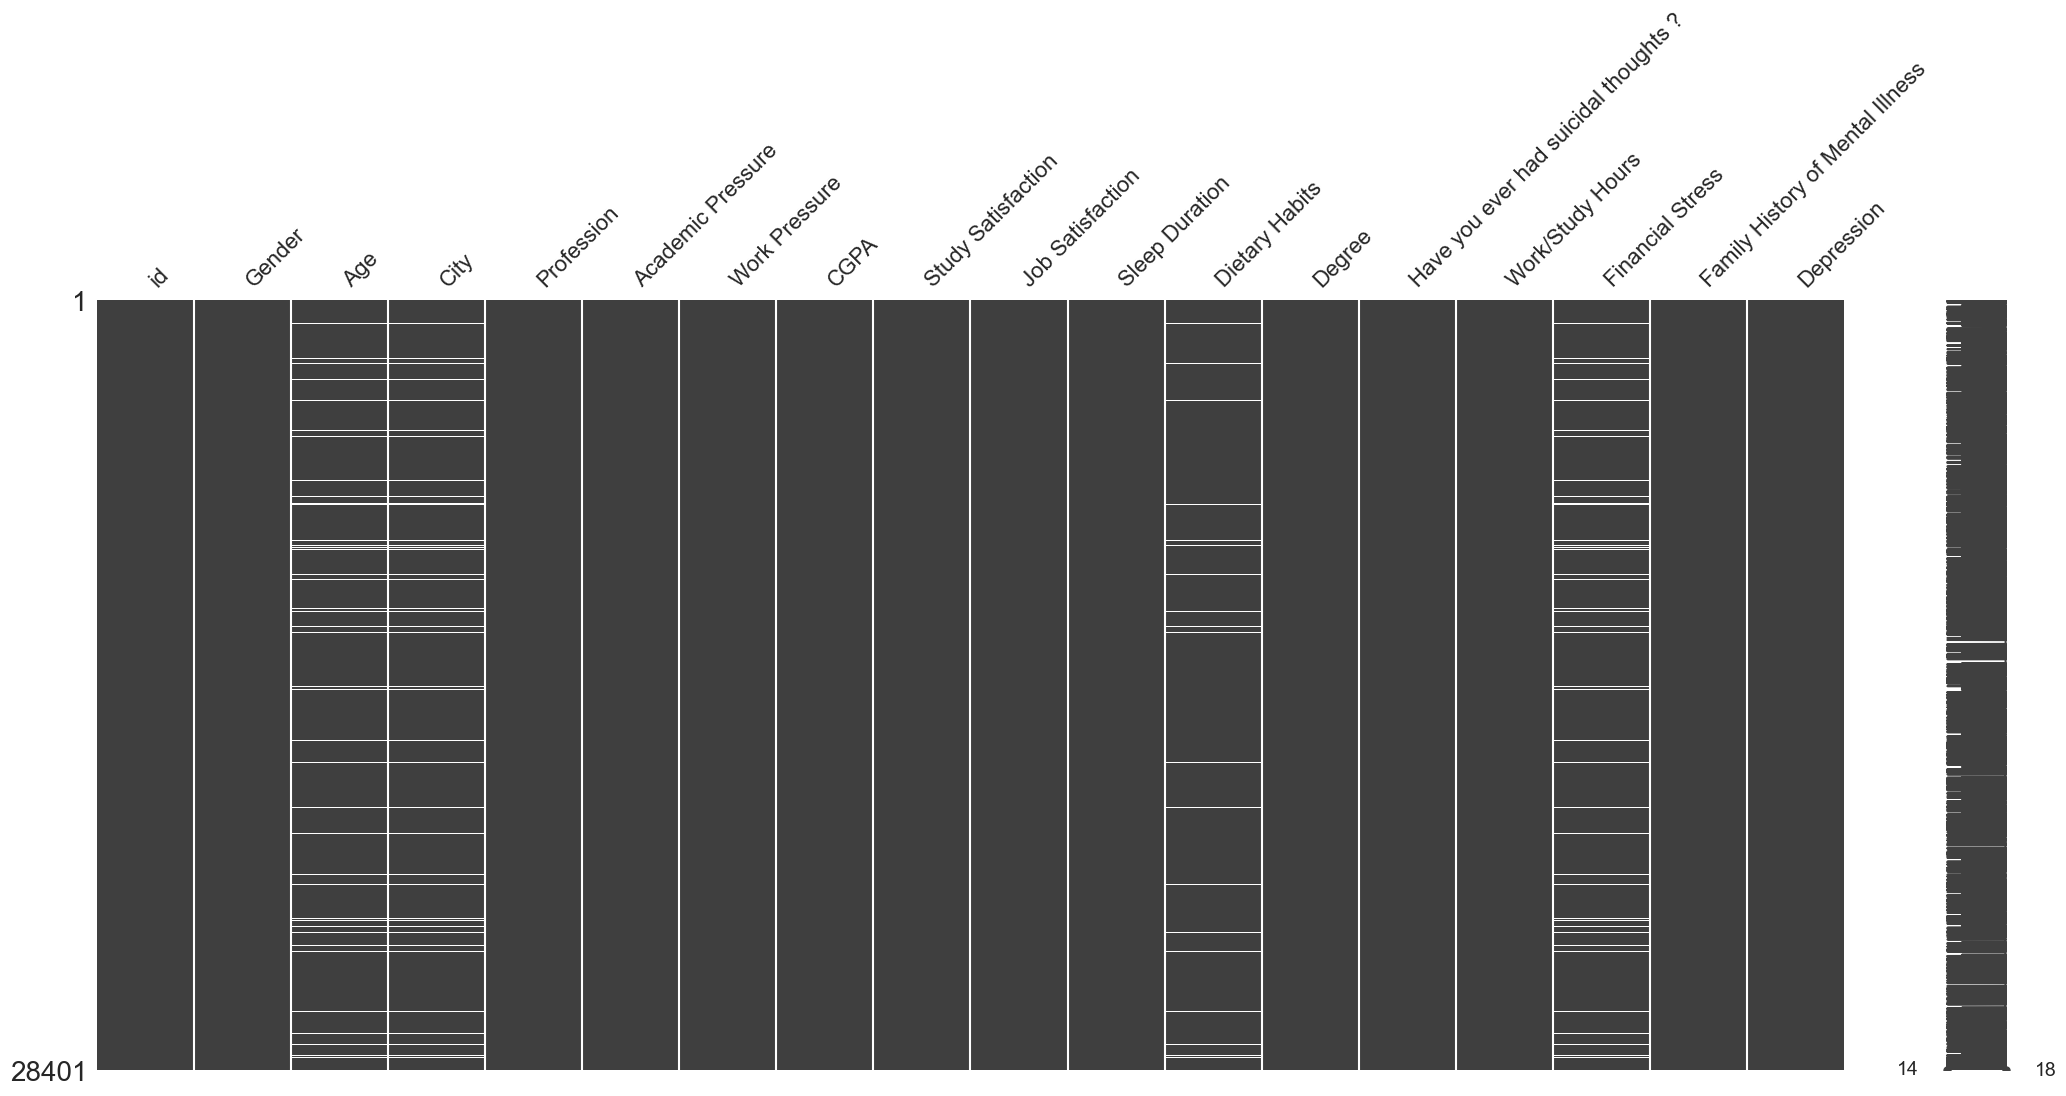

In [5]:
msn.matrix(data)

### Correlation Heatmap for Key Variables

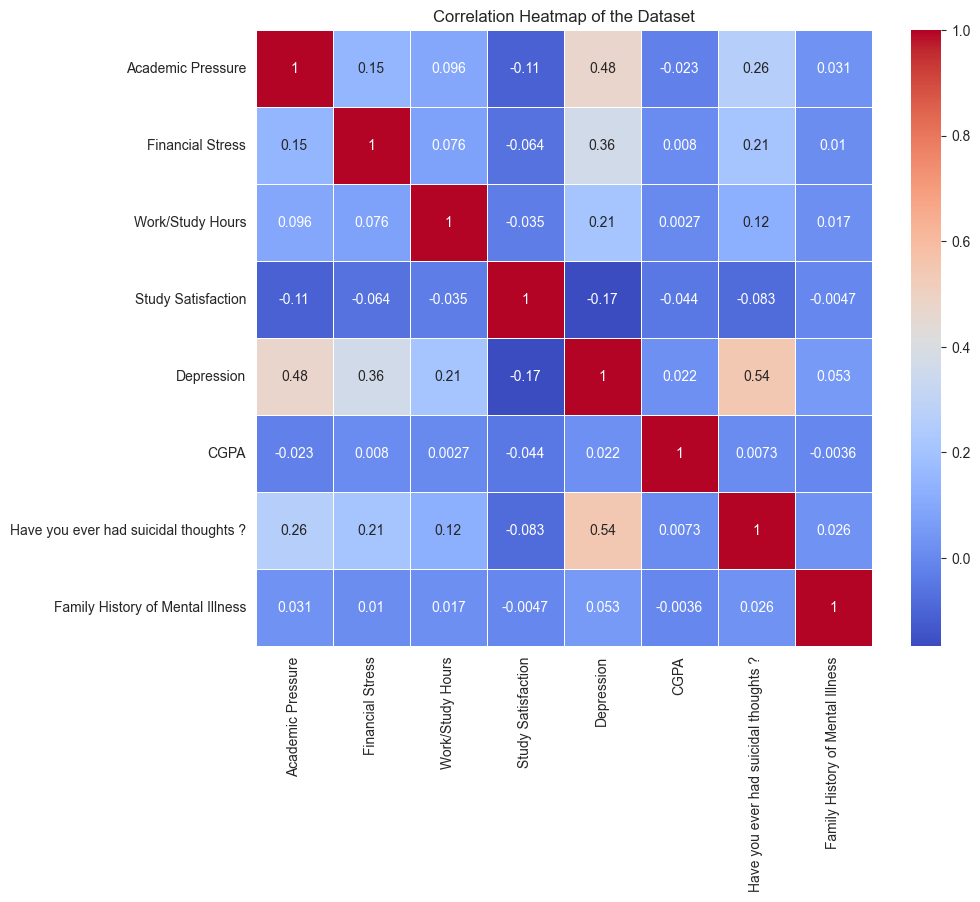

In [6]:
data['Have you ever had suicidal thoughts ?'] = data['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})

selected_columns = [
    'Academic Pressure',
    'Financial Stress',
    'Work/Study Hours',
    'Study Satisfaction',
    'Depression',
    'CGPA',
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness'
]

correlation_matrix = data[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of the Dataset')
plt.show()

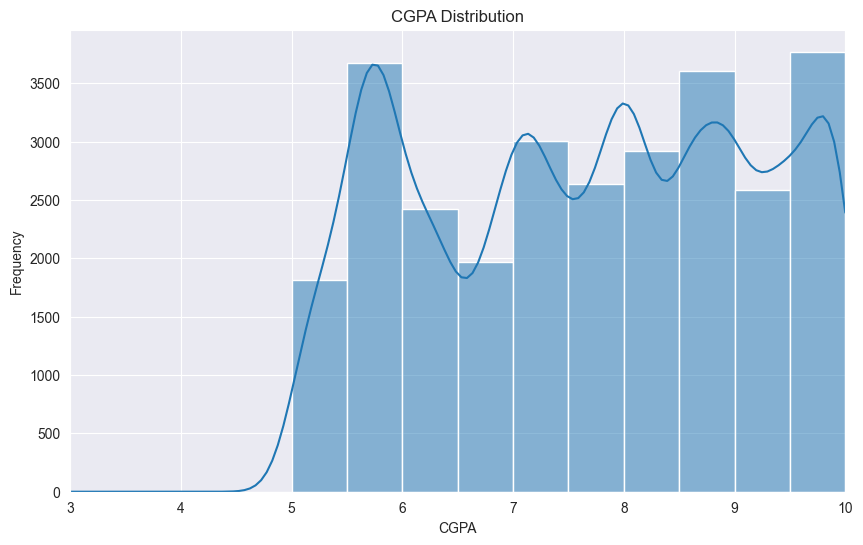

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data["CGPA"], kde=True, bins=10, binwidth=0.5)
plt.xlim(3, 10)  
plt.title("CGPA Distribution")
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.show()

### Gender Distribution

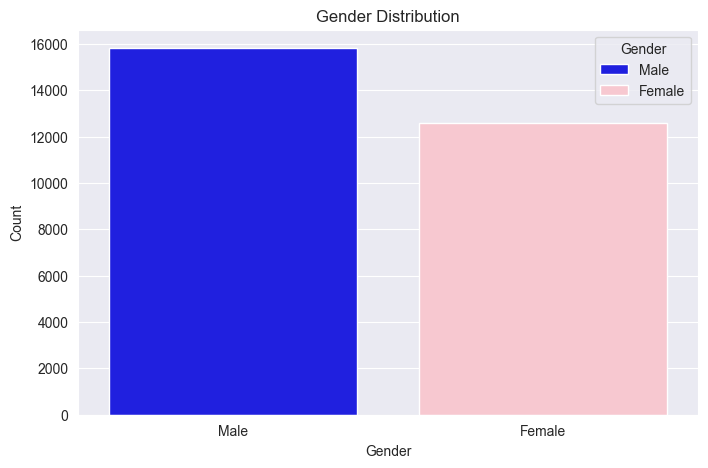

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=data, hue='Gender', palette={'Male': 'blue', 'Female': 'pink'})
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Male', 'Female'], title='Gender')
plt.show()

### Relationship between Sleep Duration and Depression

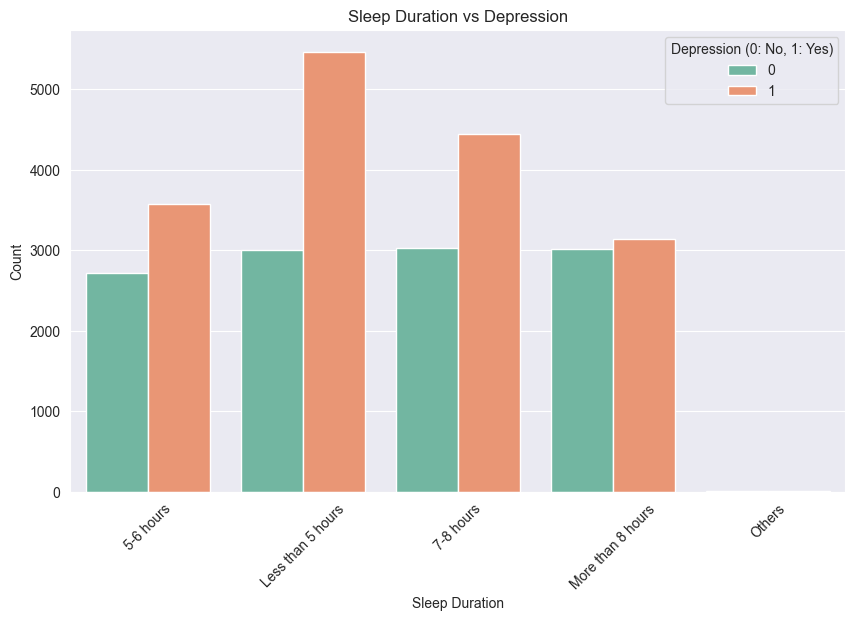

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sleep Duration', hue='Depression', data=data, palette='Set2')
plt.title('Sleep Duration vs Depression')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.legend(title='Depression (0: No, 1: Yes)')
plt.xticks(rotation=45)
plt.show()

### Boxplot for Financial Stress vs Depression

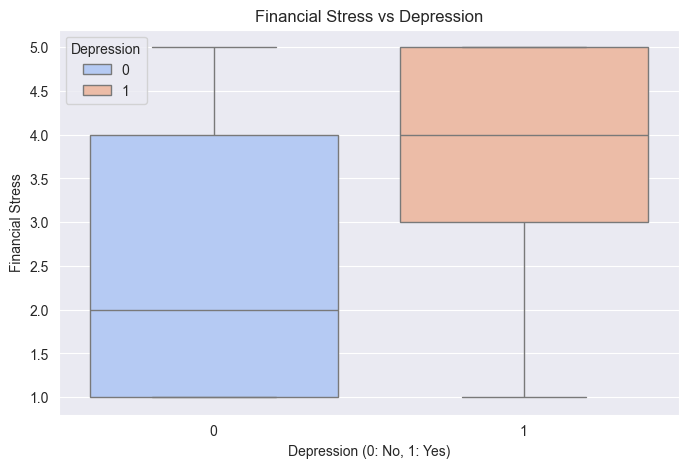

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Depression', y='Financial Stress', data=data, hue='Depression', palette='coolwarm')
plt.title('Financial Stress vs Depression')
plt.xlabel('Depression (0: No, 1: Yes)')
plt.ylabel('Financial Stress')
plt.legend(title='Depression')
plt.show()

## Data Cleaning 

### Removing Duplicates and Handling Missing Values

In [11]:
print("Before dropping duplicates: ",sum(data.duplicated()))
data = data.drop_duplicates()
print("After dropping duplicates: ",sum(data.duplicated()))
print()

print("Before handling nulls: ")
print(data.isnull().sum())

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])
print()

print("After handling nulls: ")
print(data.isnull().sum())

Before dropping duplicates:  500
After dropping duplicates:  0

Before handling nulls: 
id                                          0
Gender                                      0
Age                                      1417
City                                     1417
Profession                                  0
Academic Pressure                           0
Work Pressure                               0
CGPA                                        0
Study Satisfaction                          0
Job Satisfaction                            0
Sleep Duration                              0
Dietary Habits                            851
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                         1420
Family History of Mental Illness            0
Depression                                  0
dtype: int64

After handling nulls: 
id                                       0
Gend

### Removing outliers

In [12]:
def drop_outliers(Data, Column):
    Q1 = Data[Column].quantile(0.25)
    Q3 = Data[Column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    Data.drop(Data[(Data[Column] < lower_bound) | (Data[Column] > upper_bound)].index, inplace=True)

data.drop('Work Pressure', inplace=True, axis=1)
data.drop('Job Satisfaction', inplace=True, axis=1)
drop_outliers(data, 'CGPA')
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
1,8,Female,24.0,Bangalore,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,0,3.0,2.0,1,0
2,26,Male,31.0,Srinagar,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,0,9.0,1.0,1,0
3,30,Female,28.0,Varanasi,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,1,4.0,5.0,1,1
4,32,Female,25.0,Jaipur,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,1,1.0,1.0,0,0


## Data Analysis 

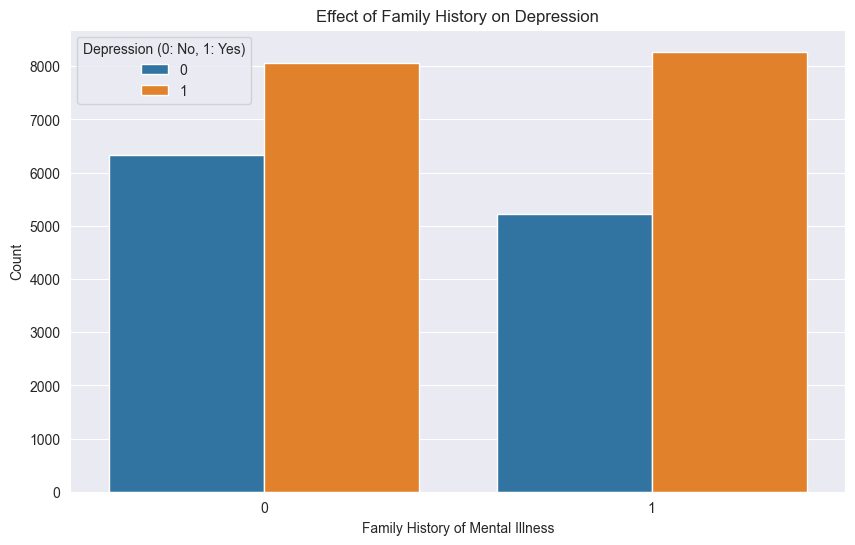

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Family History of Mental Illness', hue='Depression', data=data)
plt.title("Effect of Family History on Depression")
plt.xlabel("Family History of Mental Illness")
plt.ylabel("Count")
plt.legend(title='Depression (0: No, 1: Yes)')
plt.show()

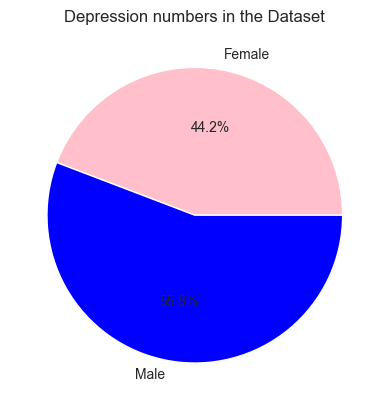

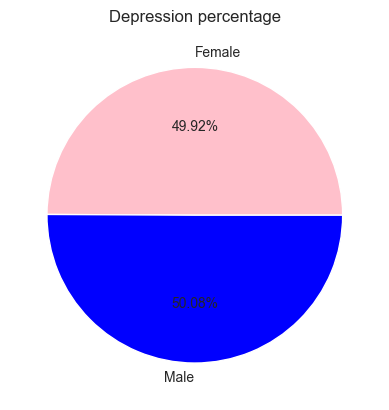

In [14]:
depression_by_gender = data.groupby("Gender")["Depression"].sum()
depression_rate_by_gender = data.groupby("Gender")["Depression"].mean()

plt.pie(depression_by_gender, labels=depression_by_gender.index, colors=['pink','blue'], autopct='%1.1f%%')
plt.title('Depression numbers in the Dataset')
plt.show()

plt.pie(depression_rate_by_gender, labels=depression_rate_by_gender.index, colors=['pink','blue'], autopct='%1.2f%%')
plt.title('Depression percentage')
plt.show()

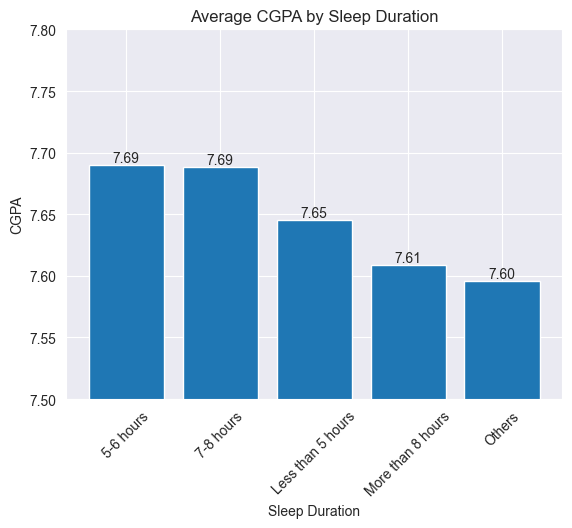

In [16]:
sleep_groub = data.groupby('Sleep Duration')['CGPA'].mean()

bars = plt.bar(sleep_groub.index,sleep_groub)
plt.ylim(7.5,7.8)
plt.xticks(rotation=45)
plt.title("Average CGPA by Sleep Duration")
plt.xlabel("Sleep Duration")
plt.ylabel("CGPA")
plt.bar_label(bars, fmt='%.2f')
plt.show()